# Metodo del descenso por el gradiente

Cómo encontramos el mínimo de la función costo cuando la vemos como función de los parámetros?

1. Estudiaremos una $f(x)$ donde $x$ no es ni los datos ni la predicción del modelo sino los parámetros de la red neuronal.

2. x puede ser un vector de dimensiones muy muy grandes.

Bibliografía: 

1. https://www.datacamp.com/tutorial/tutorial-gradient-descent
2. https://builtin.com/data-science/gradient-descent
3. https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

## El problema en contexto: 

Queremos ajustar parámetros de una función o modelo para que describa apropiadamente ciertos datos.


![ajuste](1_imhEKEpzX24CC_LIIureBw.gif)

![superficie](gradient_descent.webp)

### Función cóncava 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

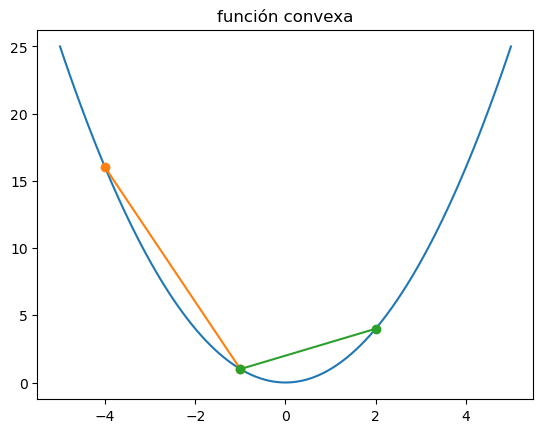

In [6]:
x = np.linspace(-5,5,100)
def f_conv(x): 
    return x**2

x1 = -4
x2 = -1
x3 = 2  
x4 = 4

plt.plot(x,f_conv(x))
plt.plot([x1,x2],[f_conv(x1), f_conv(x2)], marker='o')
plt.plot([x2,x3],[f_conv(x2), f_conv(x3)], marker='o')
plt.title('función convexa')
plt.show()

**Las funciones convexas tiene un único mínimo!**

Una función no convexa:

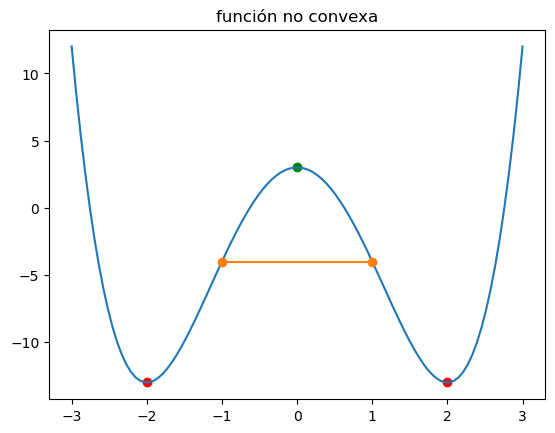

In [7]:
x = np.linspace(-3,3,100)
def f_no_conv(x): 
    return -8*x**2 + x**4 + 3

x1 = -1
x2 = 1
plt.plot(x,f_no_conv(x))
plt.plot([x1,x2],[f_no_conv(x1), f_no_conv(x2)], marker='o')
#plt.plot([x2,x3],[f_no_conv(x2), f_no_conv(x3)])
plt.scatter([-2,2],[f_no_conv(-2), f_no_conv(2)], color='r')
plt.scatter([0],[f_no_conv(0)], color='g')
plt.title('función no convexa')
plt.show()

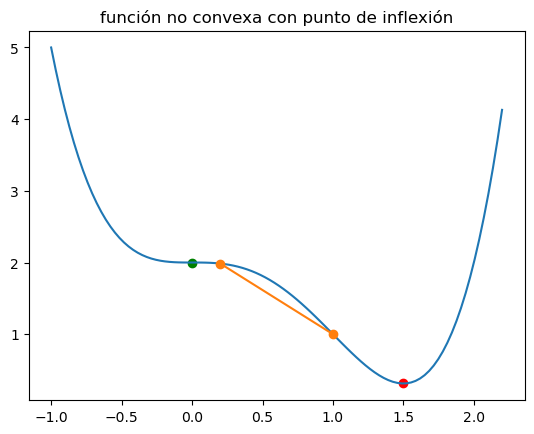

In [8]:
x = np.linspace(-1,2.2,100)
def f_no_conv(x): 
    return 2 + -2*x**3 + x**4 

x1=0.2
x2=1
x3=2
plt.plot(x,f_no_conv(x))
plt.plot([x1,x2],[f_no_conv(x1), f_no_conv(x2)], marker='o')
#plt.plot([x2,x3],[f_no_conv(x2), f_no_conv(x3)])
plt.scatter([1.5],[f_no_conv(1.5)], color='r')
plt.scatter([0],[f_no_conv(0)], color='g')
plt.title('función no convexa con punto de inflexión')
plt.show()

## Descenso por el gradiente

Se trata de bajar por la máxima pendiente de la función. 

En el caso de una dimensión, la pendiente está dada por la derivada, que es el límite del cociente:

$$ 
\frac{df}{dx} = \lim_{x_i \to x} \frac{f(x_i) - f(x)}{x_i - x}
$$

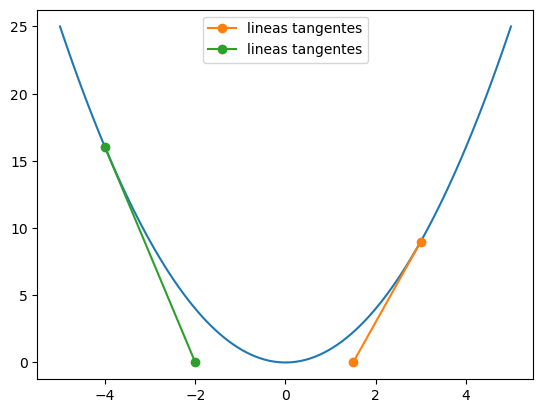

In [9]:
def f(x):
    return x**2

def df(x):
    return 2*x

def lin_f(x,x0):
    return df(x0)*(x-x0) + f(x0)

def zero_lin_f(x):
    return x -f(x)/df(x)  

x = np.linspace(-5,5,100)

x0 = 3
x1 = -4
plt.plot(x,f(x))
plt.plot([x0, zero_lin_f(x0)], [f(x0),0], marker='o', label='lineas tangentes')
plt.plot([x1, zero_lin_f(x1)], [f(x1),0], marker='o', label='lineas tangentes')
plt.legend()

#### Aproximación a líneas tangentes

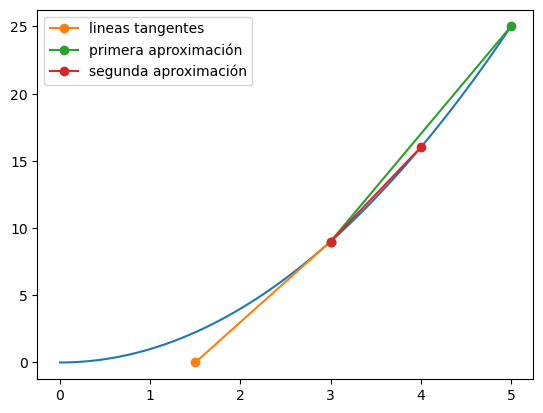

In [10]:
x = np.linspace(0,5,100)

x0 = 3
x1 = 5
x2 = 4
plt.plot(x,f(x))
plt.plot([x0, zero_lin_f(x0)], [f(x0),0], marker='o', label='lineas tangentes')
plt.plot([x0, x1], [f(x0),f(x1)], marker='o', label='primera aproximación')
plt.plot([x0, x2], [f(x0),f(x2)], marker='o', label='segunda aproximación')
plt.legend()

### Descendiendo por el gradiente

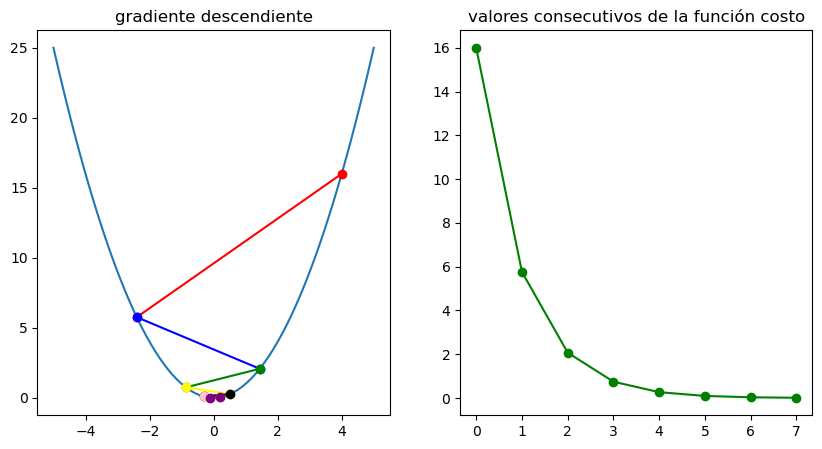

In [20]:
def f(x):
    return x**2

def df(x):
    return 2*x

x = np.linspace(-5,5,100)

a = 0.8 #0.1, 0.3, 0.8 "learning rate"

x1 = 4
x2 = x1 - a*df(x1)
x3 = x2 - a*df(x2)
x4 = x3 - a*df(x3)
x5 = x4 - a*df(x4)
x6 = x5 - a*df(x5)
x7 = x6 - a*df(x6)
x8 = x7 - a*df(x7)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(x,f(x))
ax[0].plot([x1,x2],[f(x1),f(x2)], color='red', marker='o')
ax[0].plot([x2,x3],[f(x2),f(x3)], color='blue', marker='o')
ax[0].plot([x3,x4],[f(x3),f(x4)], color='green', marker='o')
ax[0].plot([x4,x5],[f(x4),f(x5)], color='yellow', marker='o')
ax[0].plot([x5,x6],[f(x5),f(x6)], color='black', marker='o')
ax[0].plot([x6,x7],[f(x6),f(x7)], color='pink', marker='o')
ax[0].plot([x7,x8],[f(x7),f(x8)], color='purple', marker='o')
ax[0].set_title('gradiente descendiente')

ax[1].plot([f(x1),f(x2),f(x3),f(x4),f(x5),f(x6),f(x7),f(x8)], color='green', marker='o')
ax[1].set_title('valores consecutivos de la función costo')
plt.show()


    

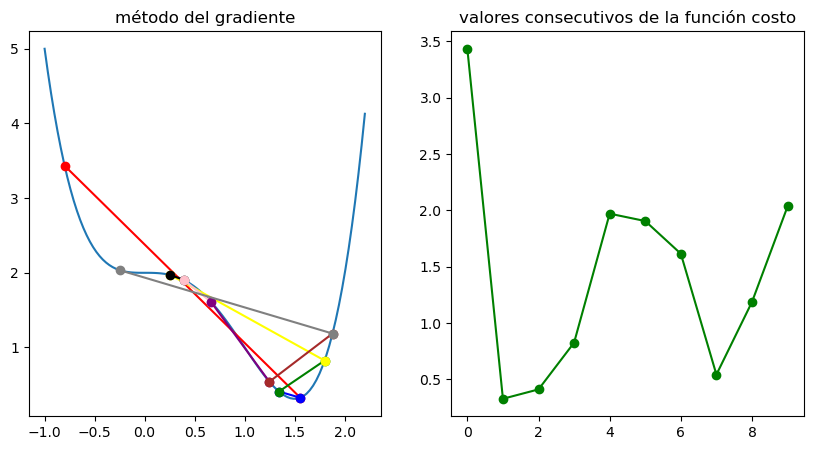

In [19]:
def f(x):
    return 2 + -2*x**3 + x**4

def df(x):
    return -6*x**2 + 4*x**3

x = np.linspace(-1,2.2,100)

a = 0.4 #0.1, 0.4, 0.2

x1 = -0.8
x2 = x1 - a*df(x1)
x3 = x2 - a*df(x2)
x4 = x3 - a*df(x3)
x5 = x4 - a*df(x4)
x6 = x5 - a*df(x5)
x7 = x6 - a*df(x6)
x8 = x7 - a*df(x7)
x9 = x8 - a*df(x8)
x10 = x9 - a*df(x9)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x,f(x))
axs[0].plot([x1,x2],[f(x1),f(x2)], color='red', marker='o')
axs[0].plot([x2,x3],[f(x2),f(x3)], color='blue', marker='o')
axs[0].plot([x3,x4],[f(x3),f(x4)], color='green', marker='o')
axs[0].plot([x4,x5],[f(x4),f(x5)], color='yellow', marker='o')
axs[0].plot([x5,x6],[f(x5),f(x6)], color='black', marker='o')
axs[0].plot([x6,x7],[f(x6),f(x7)], color='pink', marker='o')
axs[0].plot([x7,x8],[f(x7),f(x8)], color='purple', marker='o')
axs[0].plot([x8,x9],[f(x8),f(x9)], color='brown', marker='o')
axs[0].plot([x9,x10],[f(x9),f(x10)], color='gray', marker='o')
axs[0].set_title('método del gradiente')
#plt.show()
axs[1].plot([f(x1),f(x2),f(x3),f(x4),f(x5),f(x6),f(x7),f(x8),f(x9),f(x10)], color='green', marker='o')
axs[1].set_title('valores consecutivos de la función costo')
plt.show()





### Caso 2-D 

En 2 dimensiones el gradiente se define como:

$$ 
\nabla f = (\frac{\partial f}{\partial x^1}, \frac{\partial f}{\partial x^2})
$$

En n dimensiones como:

$$ 
\nabla f = (\frac{\partial f}{\partial x^1}, \frac{\partial f}{\partial x^2}, \ldots , \frac{\partial f}{\partial x^n})
$$

Donde,

$$
\frac{\partial f}{\partial x^i} = \lim_{y \to x^i} \frac{f(x^1, x^2, \ldots, y, \dots, x^n) - f(x^1, x^2, \ldots, x^i, \dots, x^n)}{y - x^i}
$$

**Esto se hace de manera automática dentro de las librerías que manejan las redes neuronales.**

In [11]:


x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)


Text(0.5, 1.0, 'Contour Plot')

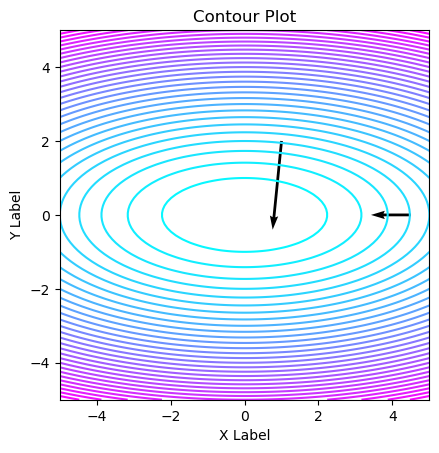

In [15]:
# Define vector components
x1 = 1
y1 = 2
x2 = 4.5
y2 = 0
a = 0.3 # learning rate
c1 = 0.4 # 1, 0.4
c2 = 2 # 1, 2

# Define function to plot
def f(x, y):
    return c1*x**2 + c2*y**2

def grad_f(x, y):
    return 2*c1*x, 2*c2*y

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

grad_f_x1, grad_f_y1 = grad_f(x1,y1)
grad_f_x2, grad_f_y2 = grad_f(x2,y2)

# Create plot
fig, ax = plt.subplots()
ax.quiver(x1, y1, - a*grad_f_x1, - a*grad_f_y1, angles='xy', scale_units='xy', scale=1)
ax.quiver(x2, y2, - a*grad_f_x2, - a*grad_f_y2, angles='xy', scale_units='xy', scale=1)
ax.contour(X, Y, Z, cmap='cool', levels=30)

# Set aspect ratio
ax.set_aspect('equal', adjustable='box')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Contour Plot')

# Show plot

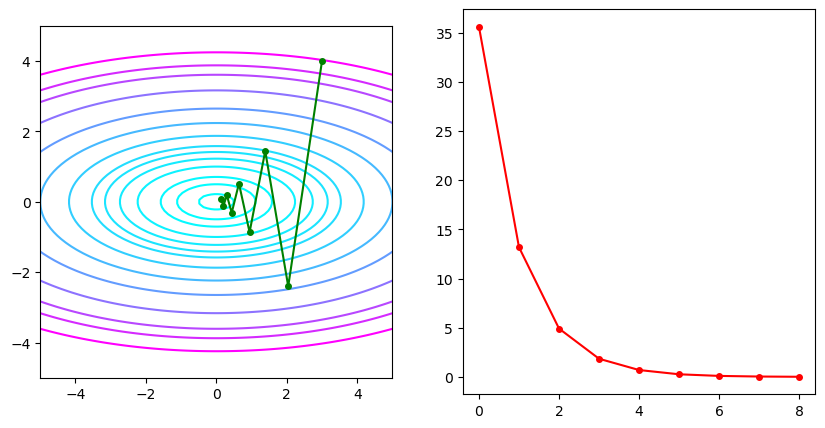

In [16]:
a = 0.4 # 0.2, 0.3, 0.4, 0.5
x0, y0 = 3, 4
x1, y1 = grad_f(x0, y0)
x1, y1 = x0 - a*x1, y0 - a*y1
x2, y2 = grad_f(x1, y1)
x2, y2 = x1 - a*x2, y1 - a*y2
x3, y3 = grad_f(x2, y2)
x3, y3 = x2 - a*x3, y2 - a*y3
x4, y4 = grad_f(x3, y3)
x4, y4 = x3 - a*x4, y3 - a*y4
x5, y5 = grad_f(x4, y4)
x5, y5 = x4 - a*x5, y4 - a*y5
x6, y6 = grad_f(x5, y5)
x6, y6 = x5 - a*x6, y5 - a*y6
x7, y7 = grad_f(x6, y6)
x7, y7 = x6 - a*x7, y6 - a*y7
x8, y8 = grad_f(x7, y7)
x8, y8 = x7 - a*x8, y7 - a*y8

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot([x0,x1,x2,x3,x4,x5,x6,x7,x8],[y0,y1,y2,y3,y4,y5,y6,y7,y8], color='green', marker='o', markersize=4)
ax[1].plot([f(x0,y0),f(x1,y1),f(x2,y2),f(x3,y3),f(x4,y4),f(x5,y5),f(x6,y6),f(x7,y7),f(x8,y8)], color='red', marker='o', markersize=4)

